<a href="https://colab.research.google.com/github/Piece-kun/python-for-DPaV/blob/main/labs/%D0%9B%D0%A03_%D0%9E%D0%B1%D0%B5%D1%81%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** исследование и обработка данных для повышения их качества.

**Краткое описание:** в лабораторной работе приводится поэтапный план изучения и обработки намеренно не предобработанных данных. Необходимо выполнить все этапы плана и оценить результаты преобразований.

# Данные



В папке [Data/lab3](https://drive.google.com/drive/folders/1437z7m5Ut4WUJOhJg1oZz13dtBpxgFKs?usp=share_link) расположена таблица `monster_com_job_sample.com` с данными о вакансиях. Также эти данные с описанием и примерами обработки можно найти на [kaggle](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data#).

##### **Формат данных**

```
country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
United States of America,US,"",No,jobs.monster.com,"TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:вАҐ Call tracking softwareвАҐ Phone based technical supportвАҐ Problem documentation and communicationвАҐ Remote Desktop Management ToolsвАҐ Respond to customer requestsвАҐ General understanding of LANDeskвАҐ Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?вАҐ TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!вАҐ TeamSoft has been in business since 1996вАҐ TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project managementвАҐ TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career moveвАҐ TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar matchвАҐ Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new positionвАҐ Our longest running consultant has been with us for 16 yearsвАҐ Consultants can participate in our charitable giving committee. To date, TeamSoft's charitable giving committee has donated over $100,000!TeamSoft is owned by local IT professionals. Our team also has deep experience with IT staffing. Our clients understand this and rely on our expertise. That is why TeamSoft is the Madison Area's largest privately owned IT consulting firm, with more than 200 current consultants! With over 50 active clients, TeamSoft will give you the greatest exposure to the widest range of IT careers.Our owners possess a combined 60+ years of IT consulting experience. Our recruiting and Account Management staff are very well-versed in our client markets. We get you. We know you. We know what you do every day. And we know what you deal with on the job.You take your career seriously and so do we. At TeamSoft you are not just a resume or number. Our goal is to create long-term partnerships with each of our consultants, and according to feedback from many of them, we are very good at this. Click HERE to see what our consultants have to say about working with TeamSoft.TeamSoft -- Promote yourself!TeamSoft is an equal employment opportunity employer functioning under an Affirmative Action Plan.",IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702","",http://jobview.monster.com/it-support-technician-job-madison-wi-us-167855963.aspx?mescoid=1500134001001&jobPosition=20,"",IT/Software Development,11d599f229a80023d2f40e7c52cd941e
United States of America,US,"",No,jobs.monster.com,"The Wisconsin State Journal is seeking a flexible and motivated reporter/editor to lead its three-person business desk. WeвАЩre looking for an experienced journalist able to spot trends, be a watchdog and reflect the Madison areaвАЩs vibrant entrepreneurial community. This is a hybrid reporting and editing position that calls for a fleet-footed, multimedia storyteller able to maximize the newspaperвАЩs online presentation while also editing two sections a week. Candidates must have strong news judgment, be well versed in business news and trends and be able to quickly prioritize coverage.At least five yearsвАЩ experience reporting or editing for digital and print platforms desired. To be considered for the position, applicants must apply online.¬†As part of your online application, please attach five samples of your work or links to five recent stories.Wisconsin State Journal, 1901 Fish Hatchery Road, Madison, WI 53713Affirmative Action/Equal Opportunity Employer/Pre-employment drug testing appliesPI94338362Apply Here",Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-editor-job-madison-wi-us-167830105.aspx?mescoid=2700437001001&jobPosition=7,"","",e4cbb126dabf22159aff90223243ff2a
...
```

##### **Описание полей**
 - ```country``` — наименование страны;
 - ```country_code``` — код страны;
 - ```date_added``` — дата размещения вакансии;
 - ```has_expired``` — актуальность вакансии;
 - ```job_board``` — агрегатор вакансий, с которого собраны данные;
 - ```job_description``` — описание вакансии;
 - ```job_title``` — наименование должности;
 - ```job_type``` — вид занятости;
 - ```location``` — метоположение организации;
 - ```organization``` — наименование организации;
 - ```page_url``` — ссылка на страницу с вакансией;
 - ```salary``` — заработная плата;
 - ```sector``` — сфера деятельности;
 - ```uniq_id``` — уникальный идентификатор записи о вакансии.

# Понимание данных

In [4]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns

В датасете есть несколько столбцов, в каждой ячейке которых записано одно и то же значение. Есть столбцы, в которых формат записи значений не стандартизирован. А есть такие, где указана информация, не соответствующая названию столбца.

**Первый этап изучения данных** – понять, какие основные проблемы предстоит решить для каждого из столбцов. Для этого загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [5]:

pd.set_option('display.max_colwidth', 200)
df = pd.read_csv('/monster_com_job_sample.csv')
df.sample(5)


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
13657,United States of America,US,NaN,No,jobs.monster.com,"HSI seeks a Vice President of IT Software Development for a full time job in Mt. Laurel, NJ.****We are looking for a candidates who has lead Java based software development organizations. We are n...",VP IT Software Development Job in Mount Laurel,Full Time,"Mount Laurel, NJ 08054",NaN,http://jobview.monster.com/VP-IT-Software-Development-Job-Mount-Laurel-NJ-US-164946364.aspx?mescoid=1100011001001&jobPosition=13,"190,000.00 - 200,000.00 $ /yearPlus bonus",Experienced (Non-Manager),064e1cb03ed6eb938aa9aa2603a48796
17072,United States of America,US,NaN,No,jobs.monster.com,"Kemper at a glanceWith $8 billion in assets, Kemper is one of the nation's leading insurers. The Kemper family of companies specializes in home, auto, life, health and valuables insurance products...",Senior Product Manager Job in Dallas,Full Time Employee,"Dallas, TX 75243",Insurance,http://jobview.monster.com/Senior-Product-Manager-Job-Dallas-TX-US-159619847.aspx?mescoid=1300092001001&jobPosition=3,NaN,Marketing/Product,ec3dfff3ec114cc5fa4d89ca52670532
5975,United States of America,US,NaN,No,jobs.monster.com,Security OfficersParrish Security Group is seeking security officers who are looking for an excellent opportunity to grow with a new security provider. We are currently hiring for two client loca...,Security Officer Job in Dallas,Full Time,"Dallas, TX 75225",Security and Surveillance,http://jobview.monster.com/Security-Officer-Job-Dallas-TX-US-164581518.aspx?mescoid=3300595001001&jobPosition=15,$11.50+ /hour,Entry Level,3fbcca60ea43519a8d964d95abacdf8c
3279,United States of America,US,NaN,No,jobs.monster.com,"RESPONSIBILITIES:Kforce has a client in Redmond, Washington (WA) that is seeking a Product Designer.Essential Functions: Designs user interfaces for web, software, and / or hardware products Write...",Product Designer - Adobe,"Full Time, Temporary/Contract/Project","Redmond, WA 98052",NaN,http://jobview.monster.com/Product-Designer-Adobe-HTML-Job-Redmond-WA-US-166679449.aspx?mescoid=2700407001001&jobPosition=10,NaN,Experienced (Non-Manager),dfd8cef32a4b8a2b7bc2f1a0699dbcaa
4519,United States of America,US,NaN,No,jobs.monster.com,Job DescriptionJob Summary:Responsible for selling FLIR products and accessories into the Fire Service market segment. Detailed Description:The successful candidate will have the following respons...,Sales Manager,Full Time Employee,"Us - Field - California, NH",Computer/IT Services,http://jobview.monster.com/sales-manager-fire-job-us-field-california-nh-us-172790330.aspx?mescoid=4100666001001&jobPosition=19,NaN,Project/Program Management,c5397478d4ac69319fc8f798f4d46906


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.


Название столбца | Тип данных | Проблемы
--- | --- | ---
```country``` |
```country_code``` |
```date_added``` |
```has_expired``` |
```job_board``` |
```job_description``` |
```job_title``` |
```job_type``` |
```location``` |
```organization``` |
```page_url``` |
```salary``` |
```sector``` |
```uniq_id``` |

### Оценка пустых ячеек в датасете

Выясните, в каких столбцах, строках и в каком количестве отсутствуют данные:
1. С помощью модуля `pandas` составьте таблицу, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек.
2. Подсчитайте количество строк датасета, в которых пустыми являются более 75% ячеек.
3. Визуализируйте число пропусков в датасете с помощью модуля, построив столбчатую диаграмму. Для удобства можно воспользоваться модулем `missingno`.


ПРОПУСКИ В СТОЛБЦАХ
                 total_cells  missing_cells
country                22000              0
country_code           22000              0
date_added             22000          21878
has_expired            22000              0
job_board              22000              0
job_description        22000              0
job_title              22000              0
job_type               22000           1628
location               22000              0
organization           22000           6867
page_url               22000              0
salary                 22000          18554
sector                 22000           5194
uniq_id                22000              0
location_format        22000              0
city                   22000            398
state                  22000           3525
zip                    22000           9995
salary_format          22000              0
------------------------------------------------------------
СТРОК С >75% ПРОПУСКОВ: 0
-------------

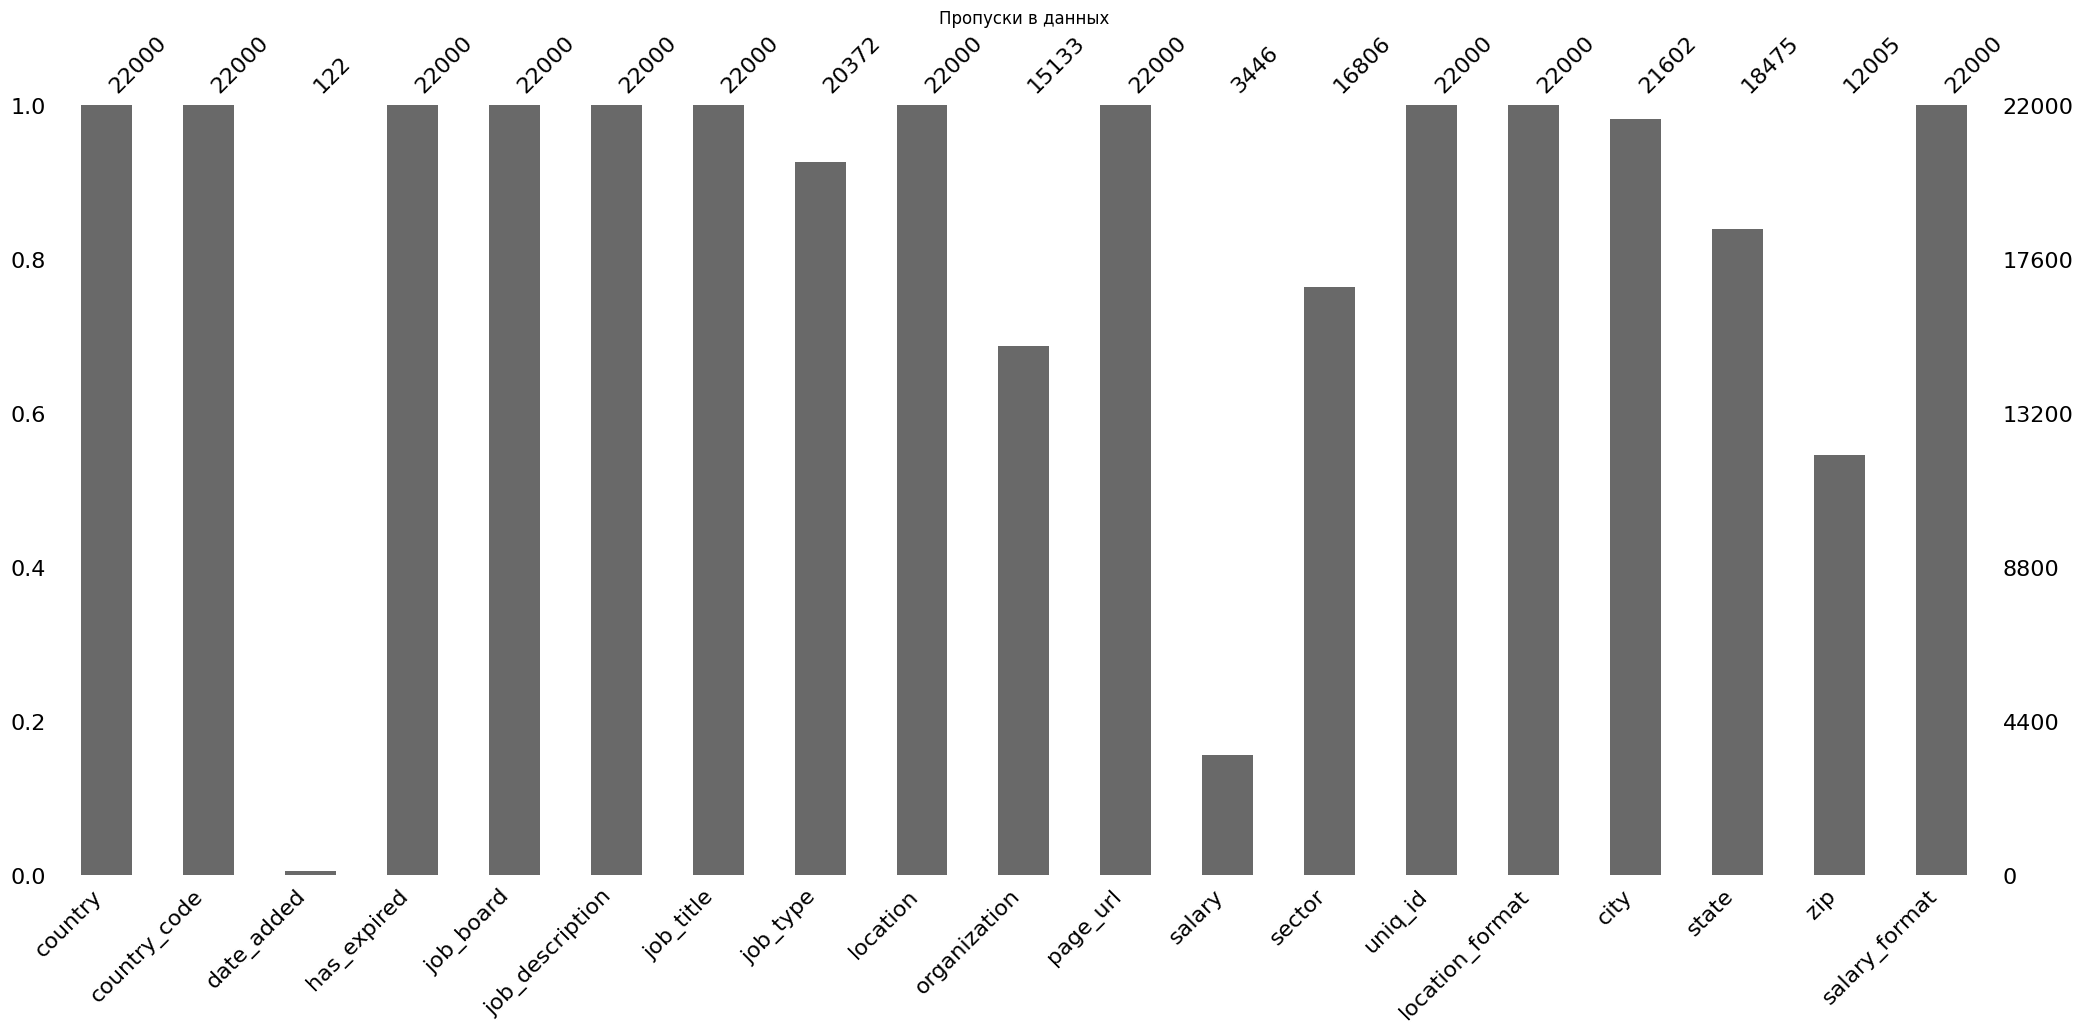

In [16]:
missing_stats = pd.DataFrame({
    'total_cells': len(df),
    'missing_cells': df.isna().sum()
})

print('ПРОПУСКИ В СТОЛБЦАХ')
print(missing_stats)
print('-' * 60)

threshold = int(df.shape[1] * 0.75)
rows_75 = (df.isna().sum(axis=1) > threshold).sum()

print('СТРОК С >75% ПРОПУСКОВ:', rows_75)
print('-' * 60)

msno.bar(df)
plt.title('Пропуски в данных')
plt.show()


# хотя есть СТОЛБЦЫ с >80% пропусков, строк с критическим количеством пропусков нет

Проверьте, как изменится размер датасета, если принять решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [7]:
df_drop_all = df.dropna()
df.shape, df_drop_all.shape
# удаление всех строк с пропусками приводит к сильной потере данных

((22000, 14), (5, 14))

### Первичная оценка данных в столбцах

Изучите данные в столбцах датасета, ответив на следующие вопросы:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли такие значения, которые встречаются более чем в одном столбце?
3. Есть ли столбцы, данные в которых не соответствуют названию столбца?

In [21]:
n_rows = len(df)

print('ПЕРВИЧНАЯ ОЦЕНКА СТОЛБЦОВ')
print('-' * 60)

const_cols = df.columns[df.nunique() == 1].tolist()
print('Есть ли столбцы с одним значением:', bool(const_cols))
print('Столбцы:', const_cols)
print('-' * 60)

unique_cols = df.columns[df.nunique() == n_rows].tolist()
print('Есть ли полностью уникальные столбцы:', bool(unique_cols))
print('Столбцы:', unique_cols)
print('-' * 60)

candidate_cols = [
    c for c in df.columns
    if 1 < df[c].nunique() < n_rows
]

has_intersections = False
for i, c1 in enumerate(candidate_cols):
    for c2 in candidate_cols[i + 1:]:
        if len(set(df[c1].dropna()) & set(df[c2].dropna())) > 0:
            has_intersections = True
            break
    if has_intersections:
        break

print('Есть ли значения, встречающиеся в нескольких столбцах:', has_intersections)
print('-' * 60)


ПЕРВИЧНАЯ ОЦЕНКА СТОЛБЦОВ
------------------------------------------------------------
Есть ли столбцы с одним значением: True
Столбцы: ['country', 'country_code', 'has_expired', 'job_board']
------------------------------------------------------------
Есть ли полностью уникальные столбцы: True
Столбцы: ['page_url', 'uniq_id']
------------------------------------------------------------
Есть ли значения, встречающиеся в нескольких столбцах: True
------------------------------------------------------------


### Дублирование данных

Для поиска дублирующихся строк выполните следующие действия:
1. В таблице есть столбец `uniq_id`, значения которого, как сказано в описании данных, являются уникальными идентификаторами записей. Проверьте, действительно ли в этом столбце все значения различны.
2. Проверьте, есть ли в таблице другие столбцы, значения которых в каждой строке различны.
3. Если игнорировать столбцы, где все значения различны, найдутся ли такие строки, для которых значения по всем остальным столбцам будут совпадать?

Оцените результаты поиска дубликатов.

In [18]:
print('uniq_id уникален:', df['uniq_id'].is_unique)
print('-' * 60)

candidate_cols = [c for c in df.columns if c not in unique_cols]
dup_rows = df.duplicated(subset=candidate_cols).sum()

print('ДУБЛИКАТЫ ПО НЕУНИКАЛЬНЫМ СТОЛБЦАМ:', dup_rows)
print('-' * 60)



uniq_id уникален: True
------------------------------------------------------------
ДУБЛИКАТЫ ПО НЕУНИКАЛЬНЫМ СТОЛБЦАМ: 1168
------------------------------------------------------------


# Практические задания

В этом разделе необходимо обработать значения в трех столбцах датасета: `location`, `salary` и `job_type`. Цель обработки – стандартизировать данные в каждом из столбцов так, чтобы их можно было анализировать.

### Задание 1

В задании 1 необходимо провести обработку столбца `location`.

#### Задание 1.1

В столбце `location` представлена информация о местоположении организации, в которой открыта вакансия. Каждое значение столбца `location` содержит информацию о городе, коде штата и почтовом индексе.

Однако не в каждой строке есть все три характеристики местоположения, а также могут встречаться разные комбинации из них, записанные в виде строки в произвольном порядке и с разными разделителями.

Например, может быть указан только код штата, только название города или только индекс. Могут быть указаны любые две характеристики из трех.

**Формулировка задания:**
1. Определите, какие форматы встречаются.
2. Напишите одно или несколько регулярных выражений для поиска выявленных форматов.
3. Визуализируйте количество найденных форматов на столбчатой или круговой диаграмме. Также покажите на ней количество строк, в которых формат определить не удалось. Какие форматы встречаются чаще всего?

Ознакомиться с теоретическим материалом по работе с регулярными выражениями можно [по ссылке](https://colab.research.google.com/drive/1eFHdmt9OROLEDJRNc2wNmz0gpE1O3sKU?usp=sharing).

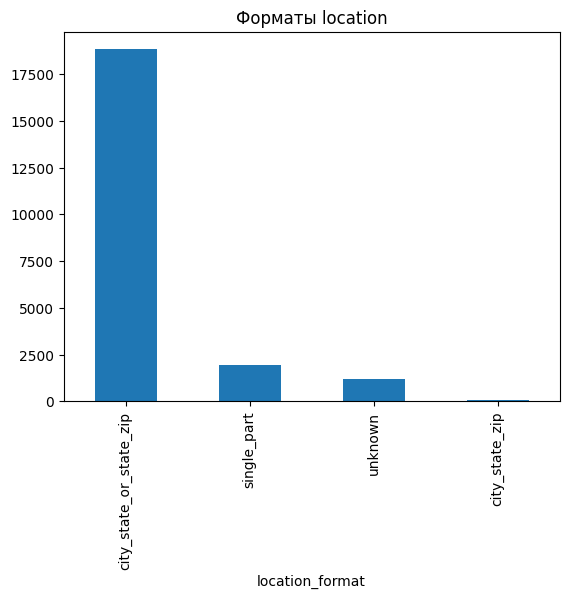

Форматы location:
location_format
city_state_or_state_zip    18809
single_part                 1927
unknown                     1192
city_state_zip                72
Name: count, dtype: int64
------------------------------------------------------------


In [24]:
def detect_format(x):
    if pd.isna(x):
        return 'unknown'
    parts = x.split(',')
    if len(parts) == 3:
        return 'city_state_zip'
    elif len(parts) == 2:
        return 'city_state_or_state_zip'
    elif len(parts) == 1:
        return 'single_part'
    return 'unknown'

df['location_format'] = df['location'].apply(detect_format)

counts = df['location_format'].value_counts()
counts.plot(kind='bar')
plt.title('Форматы location')
plt.show()

print('Форматы location:')
print(counts)
print('-' * 60)

#### Задание 1.2

В большей части строк удалось извлечь данные из ячейки столбца `location`, но остались и такие, где это не получилось. Вынесите в отдельный датасет записи, в которых не удалось определить формат записи информации о местоположении.

Над оставшимися строками проведите следующие преобразования:
1. Данные о местоположении разделите на 3 столбца: город, код штата, почтовый индекс.
2. Так как значения в столбце `почтовый индекс` являются пятизначными числами, преобразуйте их в целочисленный формат.

In [66]:
known_mask = df['location'].str.count(',') >= 1
known_locations = df[known_mask].copy()

split_cols = known_locations['location'].str.split(',', n=2, expand=True)
known_locations['city']  = split_cols[0].fillna('').str.strip()
known_locations['state'] = split_cols[1].fillna('').str.strip()
known_locations['zip']   = pd.to_numeric(split_cols[2].fillna('').str.strip(), errors='coerce')
print('--- Известные форматы ---')
print(f'Количество строк с полным форматом: {len(known_locations)}')
print(f'Примеры городов: {known_locations["city"].head(5).tolist()}')
print(f'Примеры штатов: {known_locations["state"].head(5).tolist()}')
print(f'Примеры почтовых индексов: {known_locations["zip"].head(5).tolist()}')
print('-' * 60)
unknown_locations = df[~known_mask].copy()


--- Известные форматы ---
Количество строк с полным форматом: 20073
Примеры городов: ['Madison', 'Madison', "DePuy Synthes Companies is a member of Johnson & Johnson's Family of Companies", 'Dixon', 'Camphill']
Примеры штатов: ['WI 53702', 'WI 53708', 'and is recruiting for a Senior Training Leader located in Raynham', 'CA', 'PA']
Примеры почтовых индексов: [nan, nan, nan, nan, nan]
------------------------------------------------------------


Рассмотрите отложенную часть выборки (ту, где не удалось данные из столбца `location` разделить на три поля) и сделайте выводы о возможности извлечь из данных город, код штата и почтовый индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [65]:

print('--- Неизвестные форматы ---')
print(f'Количество строк с нестандартным форматом: {len(unknown_locations)}')
print(f'Примеры значений location: {unknown_locations["location"].head(5).tolist()}')
print('Вывод: невозможно извлечь все три компонента, часть данных остаётся пустой.')
print('-' * 60)

--- Неизвестные форматы ---
Количество строк с нестандартным форматом: 1927
Примеры значений location: ['Contact name Tony Zerio', 'Wadesboro 28170', 'La Porte 46350', 'Bi-Lingual Editorial Strategist', 'Quality Engineer']
Вывод: невозможно извлечь все три компонента, часть данных остаётся пустой.
------------------------------------------------------------


### Задание 2

В задании 2 необходимо провести обработку столбца `salary`.

#### Задание 2.1

В столбце `salary`, как и в `location`, данные не стандатизированы. В нем в основном можно встретить записи в следующих форматах:

* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

Основные проблемы, которые стоит учесть при обработке форматов:
- В каждом из форматов может быть или не быть знака доллара.
- Может отсутствовать информация о периоде, за который указывается зарплата (`/hour` или `/year` в примерах).
- Зарплата может быть указана за месяц (`/month`) и за неделю (`/week`).
- В начале, конце и середине некоторых строк есть лишние пробелы, которые не стоит учитывать.

**Задание:**
1. Определите весь перечень встречающихся форматов и напишите одно или несколько регулярных выражений для их поиска.
2. Покажите на столбчатой диаграмме количество записей, содержащих каждый из форматов. Сделайте выводы.

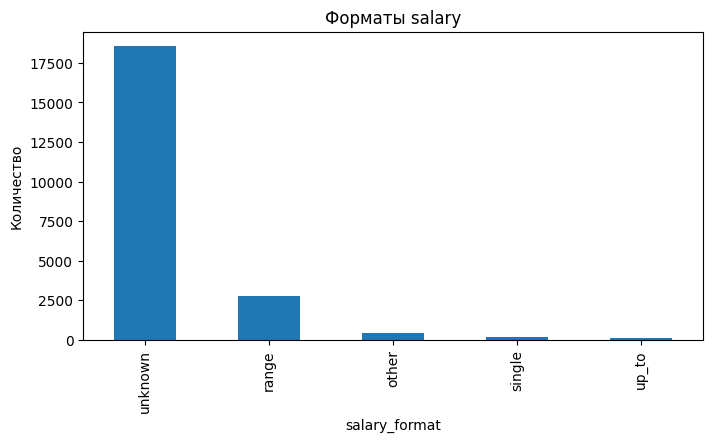

salary_format
unknown    18557
range       2785
other        400
single       157
up_to        101
Name: count, dtype: int64


In [69]:
df['salary_clean'] = df['salary'].fillna('').str.strip()

def simple_salary_format(s):
    if not s:
        return 'unknown'
    elif '-' in s:
        return 'range'
    elif s.startswith('Up to'):
        return 'up_to'
    elif '$' in s:
        return 'single'
    else:
        return 'other'

df['salary_format'] = df['salary_clean'].apply(simple_salary_format)

counts = df['salary_format'].value_counts()

counts.plot(kind='bar', figsize=(8,4), title='Форматы salary')
plt.ylabel('Количество')
plt.show()

print(counts)


#### Задание 2.2

1. Разделите столбец `salary` зарплаты три: `минимальная граница зарплаты`, `максимальная граница зарплаты`, `период`. Если значение суммы указано только одно, считайте, что это минимальная зарплата. Значение суммы в обоих столбцах преобразуйте в формат `float`.
2. Покажите на столбчатой диаграмме с группировкой среднюю и медианную минимальную зарплату в каждом периоде. Сделайте выводы.

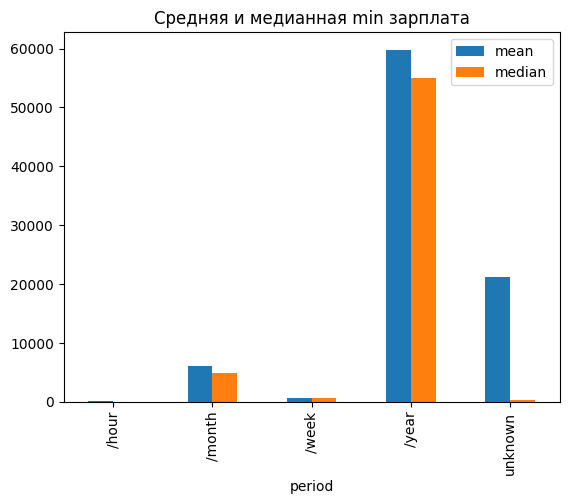

In [75]:
df['salary_clean'] = df['salary'].fillna('')
df['salary_clean'] = df['salary_clean'].str.replace(r'[^\d\.\-]', '', regex=True)
df['salary_clean'] = df['salary_clean'].replace(r'^[\.\-]*$', np.nan, regex=True)

split = df['salary_clean'].str.split('-', n=1, expand=True)
df['min_salary'] = pd.to_numeric(split[0], errors='coerce')
df['max_salary'] = pd.to_numeric(split[1].fillna(split[0]), errors='coerce')

df['period'] = df['salary'].fillna('').str.extract(r'(/hour|/year|/month|/week)')[0].fillna('unknown')

df.groupby('period')['min_salary'].agg(['mean','median']).plot(kind='bar', title='Средняя и медианная min зарплата')
plt.show()


#### Задание 2.3

Как было отмечено в задании 2.1, период, за который указывается зарплата, может отсутствовать. Восполните этот пробел в данных следующим образом:

1. Определите диапазон изменения (разброс) значений денежной суммы за каждый из встречающихся в данных периодов. Постройте гистограмму для каждого периода.
2. Определите, к среднему значению за какой период ближе всего сумма, у которой период не указан. Укажите для найденный период. В спорных случаях, где сумма одинаково близка к нескольким диапазонам, не выбирайте ничего.

Размах min_salary по периодам:
             min         max
period                     
/hour       0.0   100000.00
/month   1800.0    17688.94
/week      12.0     1100.00
/year       0.0  1000000.00
unknown     0.0   401712.00
------------------------------------------------------------


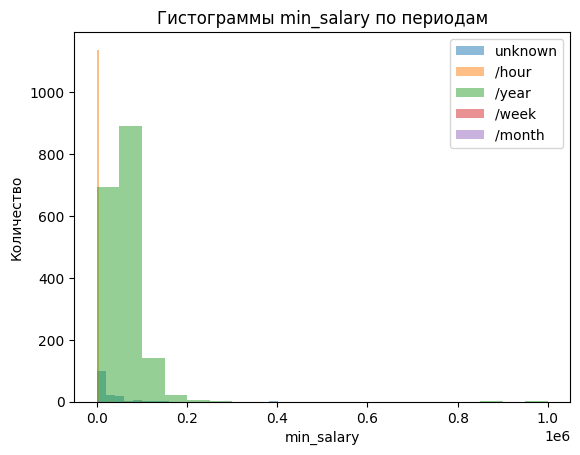

In [76]:
salary_range = df.groupby('period')['min_salary'].agg(['min','max'])
print('Размах min_salary по периодам:\n', salary_range)
print('-'*60)

for p in df['period'].unique():
    data = df.loc[df['period']==p, 'min_salary'].dropna()
    if len(data) > 0:
        plt.hist(data, bins=20, alpha=0.5, label=p)
plt.title('Гистограммы min_salary по периодам')
plt.xlabel('min_salary')
plt.ylabel('Количество')
plt.legend()
plt.show()

unknown_mask = df['period']=='unknown'
known_periods = salary_range.index.drop('unknown', errors='ignore')

for i in df[unknown_mask].index:
    val = df.at[i, 'min_salary']
    diffs = abs(salary_range.loc[known_periods, 'min'] + (salary_range.loc[known_periods, 'max']-salary_range.loc[known_periods, 'min'])/2 - val)
    if (diffs.min() != 0) and (sum(diffs == diffs.min())==1):
        df.at[i, 'period'] = diffs.idxmin()

### Задание 3

В задании 3 необходимо провести обработку столбца `job_type`. Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

Форматы в job_type и их количество:
 job_type
Full Time                                        6757
Full Time Employee                               6617
Full Time, Employee                              3360
NaN                                              1628
Full Time Temporary/Contract/Project             1062
Full Time, Temporary/Contract/Project             533
Full Time , Employee                              406
Part Time Employee                                382
Part Time                                         329
Part Time, Employee                               196
Temporary/Contract/Project                        193
Employee                                          147
Full Time / Employee                              121
Full Time , Temporary/Contract/Project             56
Part Time, Temporary/Contract/Project              34
Per Diem, Employee                                 29
Per Diem                                           22
Job Type Full Time Employee         

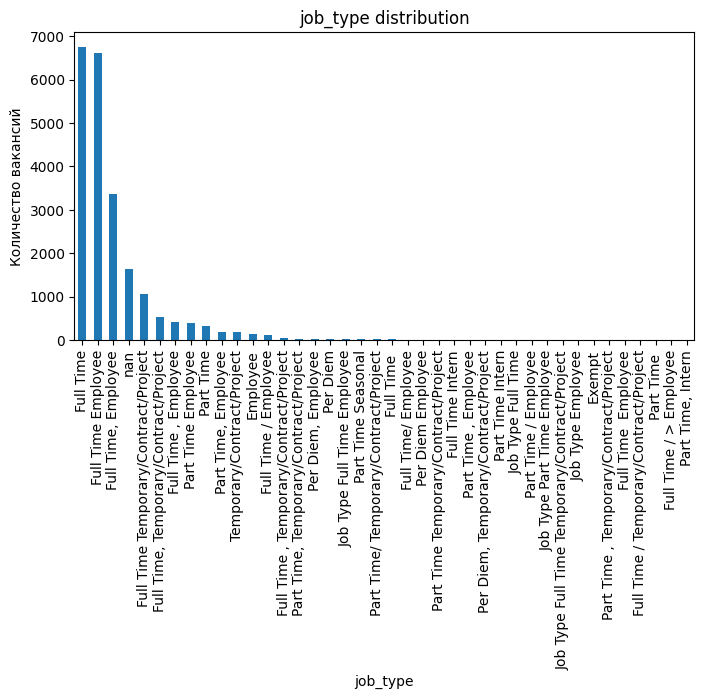

In [77]:
counts = df['job_type'].value_counts(dropna=False)
print('Форматы в job_type и их количество:\n', counts)
print('-'*60)
counts.plot(kind='bar', figsize=(8,4), title='job_type distribution')
plt.ylabel('Количество вакансий')
plt.show()


Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [79]:
df['job_type_clean'] = df['job_type'].astype(str).str.lower().str.replace(r'\s+', ' ', regex=True).str.strip()

df['job_type_clean'] = df['job_type_clean'].replace({
    'full time': 'full-time',
    'full time employee': 'full-time',
    'full time, employee': 'full-time',
    'full time / employee': 'full-time',
    'full time , employee': 'full-time',
    'job type full time employee': 'full-time',
    'full time / > employee': 'full-time',
    'full time ': 'full-time',
    'full time  employee': 'full-time',
    'part time': 'part-time',
    'part time employee': 'part-time',
    'part time, employee': 'part-time',
    'part time / employee': 'part-time',
    'part time , employee': 'part-time',
    'part time seasonal': 'part-time',
    'part time ': 'part-time',
    'per diem': 'per-diem',
    'per diem employee': 'per-diem',
    'per diem, employee': 'per-diem',
    'temporary/contract/project': 'contract',
    'full time temporary/contract/project': 'contract',
    'full time, temporary/contract/project': 'contract',
    'full time / temporary/contract/project': 'contract',
    'part time, temporary/contract/project': 'contract',
    'part time / temporary/contract/project': 'contract',
    'part time temporary/contract/project': 'contract',
    'per diem, temporary/contract/project': 'contract',
    'full time intern': 'intern',
    'part time intern': 'intern',
    'part time, intern': 'intern'
})

print(df['job_type_clean'].value_counts())


job_type_clean
full-time                                        17296
contract                                          1833
nan                                               1628
part-time                                          931
employee                                           147
per-diem                                            63
full time , temporary/contract/project              56
part time/ temporary/contract/project               16
full time/ employee                                 13
intern                                               8
job type full time                                   2
job type full time temporary/contract/project        2
job type part time employee                          2
exempt                                               1
part time , temporary/contract/project               1
job type employee                                    1
Name: count, dtype: int64


Столбец `job_type` состоит из двух частей: "полнота" занятости (`Full Time`, `Part Time`, `Per Diem`) и "тип" занятости (`Employee`, `Intern`). Кроме того, встречаются и неполные записи.

Задание:
1. Написать одно или несколько регулярных выражений для разделения столбца `job_type` на два: `полнота занятости`, `тип занятости`.
2. Если данные о полноте отсутствуют, внесите значение `Full Time`.
Если отсутствуют данные о типе – внесите `Employee`.
3. Постройте столбчатую диаграмму со стековой группировкой для полноты и типа занятости. Сделайте выводы.

              job_type employment_status employment_type
0   Full Time Employee         full time        employee
1            Full Time         full time        employee
2  Full Time, Employee         full time        employee
3            Full Time         full time        employee
4   Full Time Employee         full time        employee
5   Full Time Employee         full time        employee
6  Full Time, Employee         full time        employee
7   Full Time Employee         full time        employee
8   Part Time Employee         part time        employee
9                  NaN         full time        employee


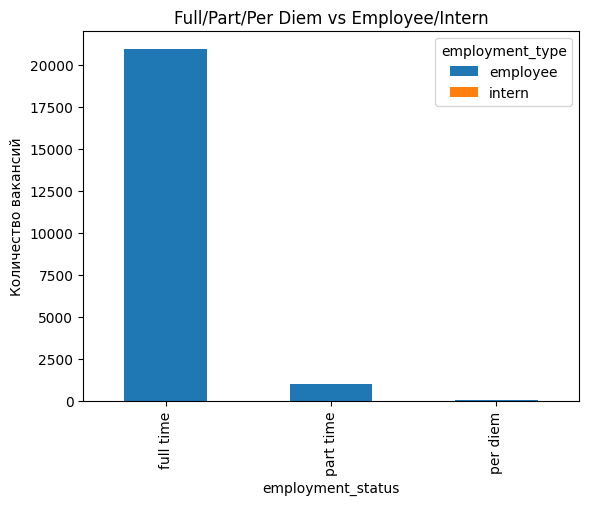

In [81]:
pattern = r'(?P<employment_status>full time|part time|per diem)?[\s,/-]*(?P<employment_type>employee|intern)?'

extracted = df['job_type'].astype(str).str.lower().str.extract(pattern)

df['employment_status'] = extracted['employment_status'].fillna('full time')
df['employment_type'] = extracted['employment_type'].fillna('employee')

print(df[['job_type','employment_status','employment_type']].head(10))

ct = pd.crosstab(df['employment_status'], df['employment_type'])
ct.plot(kind='bar', stacked=True)
plt.title('Full/Part/Per Diem vs Employee/Intern')
plt.ylabel('Количество вакансий')
plt.show()


# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения всех заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой решение задачи на обработку данных лабораторной работы, меньшее по объему, но сопоставимое по сложности тем заданиям, которые требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. В столбце `sector` часто представлены данные из столбца `organization` и наоборот. Устраните эту проблему.
2. В столбце `job_title` часто можно частично или полностью встретить указание местоположения организации. Сравните, совпадают ли в таких случаях данные с тем, что указано в столбцах `город`, `код штата`, `почтовый индекс`. Если в этих трех столбцах данные отсутствуют, заполните их данными из столбца `job_title`.
3. Практически во всех столбцах датасета вместо соответствующих названию данных иногда встречается текст из `job_description`. Найдите такие столбцы и записи с описанием вакансии в них. Покажите на столбчатой диаграмме, в каких столбцах и в каком количестве находится информация из столбца `job_description`.

# Дополнительные материалы

1. DAMA-DMBOK: Свод знаний по управлению данными: Второе издание / DAMA International; [пер. с англ.]. – Москва: ООО "Олимп-Бизнес", 2021. – 828 с.
2. Макгрегор, С. Обработка данных на Python: Data Wrangling и Data Quality: [Текст] / С. Макгрегор. – Москва: БХВ, 2024. – 432 с.